In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import matplotlib.colors as mcolors

In [2]:
def runn_avg(x, y, r):
    avgx = []; avgy = []
    ind = int(r//x[1]) + 1
    for i in range(ind, len(x)-ind):
        avgx.append(x[i])
        avgy.append(sum(y[i-ind:i+ind])/(2*ind))
    return np.array(avgx), np.array(avgy)

def plotDOS(file,EF,ice,color='b'):
    f = open(file)
    f1 = f.readlines()
    f.close()
    E = []; D = []
    for line in f1:
        L = [float(x) for x in line.split()]
        E.append(L[0]-EF); D.append(L[1])
    plt.plot(E, D, color, label=ice)
    
def get_dips(file, N, z0):
    dips = np.zeros((8,N))
    f = open(file)
    f1 = f.readlines()
    f.close()
        
    for i in range(len(f1)):
        L = [float(x) for x in f1[i].split()]
        k = int((L[2]-z0)//3.615)
        j = np.where(dips[:,k]==0)[0][0]
        dips[j,k] = L[5]
        
    return dips

# Figure 2

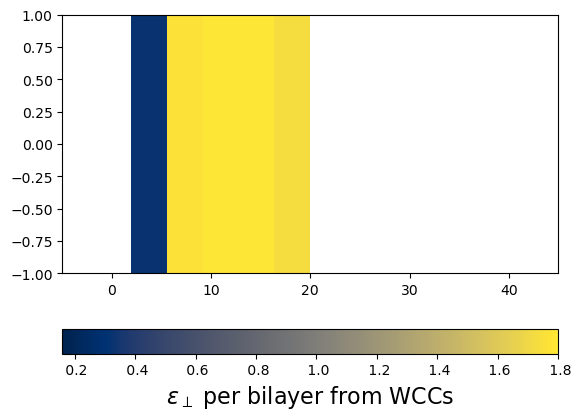

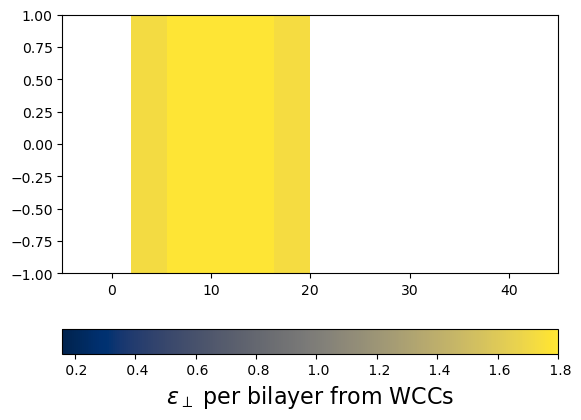

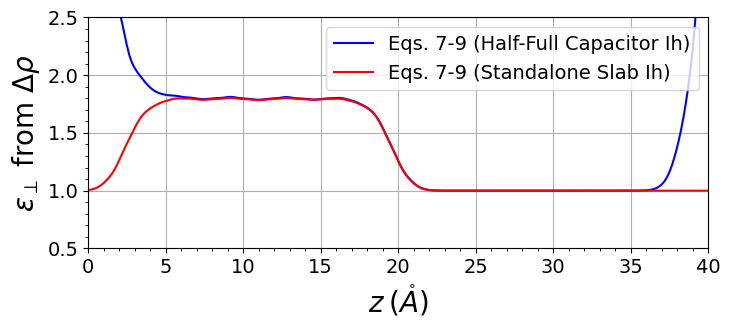

In [3]:
bias = [-0.5, 0.5]
   
# Capacitor
pathC = './Half-Full/IhAu/'
df = pd.read_csv(pathC+'charge.csv')
zC = df['z'].to_numpy(); chargeC = df['charge'].to_numpy(); chargesumC = df['chargesum'].to_numpy()

# Slab
pathS = './Half-Full/Ih/'
df = pd.read_csv(pathS+'charge.csv')
zS = df['z'].to_numpy(); chargeS = df['charge'].to_numpy(); chargesumS = df['chargesum'].to_numpy()
f = interp1d(zS, chargesumS, kind='cubic')
g = interp1d(zS, chargeS, kind='cubic')

eps0 = 5.52635e-3
A = np.cos(np.pi/6)*8.88**2
w = 3.615

# Displacement Field from Charge Density
i0 = 600; di = 150
QC = sum(chargesumC[i0:i0+di])/di
DC = QC/A
    
avgzC, avgchargesumC = runn_avg(zC, chargesumC, 1.8075)
avgPC = -(avgchargesumC/A - DC)

avgzS, avgchargesumS = runn_avg(zS, chargesumS, 1.8075)
avgPS = -avgchargesumS/A


# Get Polarizations for Capacitor
dips = np.zeros((2,8,5))
zs = np.zeros((2,8,5))
for i in range(2):
    file = pathC+'ts_{}/ts_au_layer_centres.dips'.format(bias[i])
    f = open(file)
    f1 = f.readlines()
    f.close()
    for j in range(len(f1)):
        L = [float(x) for x in f1[j].split()]
        l = int((L[2]-22)//3.615)
        k = np.where(dips[i,:,l]==0)[0][0]
        dips[i,k,l] = L[5]
        zs[i,k,l] = L[2]
PC = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
zO = np.mean(zs[0,:,:],axis=0)

# Get Polarizations for Slab
bias = [-1,1]
dips = np.zeros((2,8,5))
zs = np.zeros((2,8,5))
for i in range(2):
    file = './Half-Full/Ih/Ice_Au{}_centres.dips'.format(bias[i])
    f = open(file)
    f1 = f.readlines()
    f.close()
    for j in range(len(f1)):
        L = [float(x) for x in f1[j].split()]
        l = int((L[2]-22)//3.615)
        if l < 5:
            k = np.where(dips[i,:,l]==0)[0][0]
            dips[i,k,l] = L[5]
            zs[i,k,l] = L[2]
PS = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
zO = np.mean(zs[0,:,:],axis=0)
DS = eps0*0.05

epsC = 1/(1-PC/DC/w)
epsS = 1/(1-PS/DS/w)
for eps in [epsC, epsS]:
    x = zO-19.33464
    y = eps
    x_edges = (x[:-1] + x[1:]) / 2
    x_edges = np.concatenate(([x[0] - (x_edges[0] - x[0])],
                              x_edges,
                              [x[-1] + (x[-1] - x_edges[-1])]))
    vmin, vmax = 0.159, 1.801
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    y_edges = [-1, 1]
    C = y[np.newaxis, :]

    # Plot as vertical strips
    plt.pcolormesh(x_edges, y_edges, C, shading='flat', cmap='cividis', norm=norm)
    cbar = plt.colorbar(orientation="horizontal", format='%4.1f')
    cbar.set_label(r'$\epsilon_{\perp}$ per bilayer from WCCs', fontsize=16)
    plt.ylim(-1, 1)
    plt.xlim(-5,45.00485)
    plt.show()


plt.figure(figsize=(8, 3))
plt.plot(avgzC-19.33464, 1/(1-avgPC/DC), 'b', label='Eqs. 7-9 (Half-Full Capacitor Ih)')
plt.plot(avgzS-19.33464, 1/(1-avgPS/DS), 'r', label='Eqs. 7-9 (Standalone Slab Ih)') 
plt.minorticks_on()
plt.grid()
plt.ylim(0.5,2.5)
plt.xlim(0,40.00485)
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=20)
plt.ylabel(r'$\epsilon_{\perp}$ from $\Delta\rho$', fontsize=20)
plt.legend(fontsize=14,loc='upper right')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Figure 3

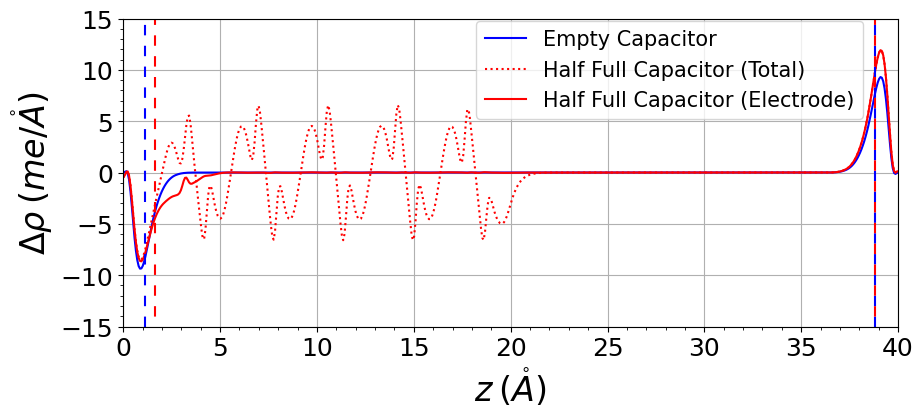

In [4]:
# Empty Capacitor
path = './Full/IhAu/empty/'
df = pd.read_csv(path+'charge.csv')
z0 = df['z'].to_numpy(); charge0 = df['charge'].to_numpy(); chargesum0 = df['chargesum'].to_numpy()

# Half-Full Capacitor
path = './Half-Full/IhAu/'
df = pd.read_csv(path+'charge.csv')
z1 = df['z'].to_numpy(); charge1 = df['charge'].to_numpy(); chargesum1 = df['chargesum'].to_numpy()

# Slab
path = './Half-Full/Ih/'
df = pd.read_csv(path+'charge.csv')
z2 = df['z'].to_numpy(); charge2 = df['charge'].to_numpy(); chargesum2 = df['chargesum'].to_numpy()
f = interp1d(z2,chargesum2,kind='cubic')
g = interp1d(z2,charge2,kind='cubic')

eps0 = 5.52635e-3
A = np.cos(np.pi/6)*8.88**2

# Displacement Field from Charge Density
A = np.cos(np.pi/6)*8.88**2
i0 = 600; di = 150
QC = sum(chargesum1[i0:i0+di])/di
DC = QC/A

DS = eps0*0.05

zL0 = np.sum(z0[:len(z0)//2]*charge0[:len(z0)//2])/np.sum(charge0[:len(z0)//2])
zL1 = np.sum(z1[:len(z1)//2]*(charge1-g(z1)*DC/DS)[:len(z1)//2])/np.sum((charge1-g(z1)*DC/DS)[:len(z1)//2])
zR0 = np.sum(z0[len(z0)//2:]*charge0[len(z0)//2:])/np.sum(charge0[len(z0)//2:])
zR1 = np.sum(z1[len(z1)//2:]*(charge1-g(z1)*DC/DS)[len(z1)//2:])/np.sum((charge1-g(z1)*DC/DS)[len(z1)//2:])

plt.figure(figsize=(10, 4))
plt.plot(z0-19.33464,charge0*1e3,'b',label=r'Empty Capacitor')
plt.plot(z1-19.33464,charge1*1e3,'r:',label=r'Half Full Capacitor (Total)')
plt.plot(z1-19.33464,(charge1-g(z1)*DC/DS)*1e3,'r',label=r'Half Full Capacitor (Electrode)')
plt.vlines([zL0-19.33464], -15, 15, color=['b'], linestyles=(0, (5, 5)))
plt.vlines([zL1-19.33464], -15, 15, color=['r'], linestyles=(5, (5, 5)))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=24)
plt.ylabel(r'$\Delta \rho \: (me/\mathring{A})$',fontsize=24)
plt.legend(fontsize=15,loc="center",
           bbox_to_anchor=(28.2, 10),
           bbox_transform=plt.gca().transData)
plt.xlim(0,40.00485)
plt.ylim(-15,15)
plt.minorticks_on()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=18)

plt.vlines([zR0-19.33464], -15, 15, color=['b'], linestyles=(0, (5, 5)))
plt.vlines([zR1-19.33464], -15, 15, color=['r'], linestyles=(5, (5, 5)))

plt.show()

# Figure 4 (S10)

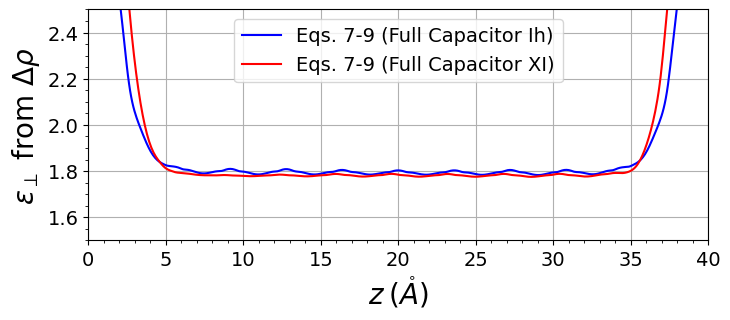

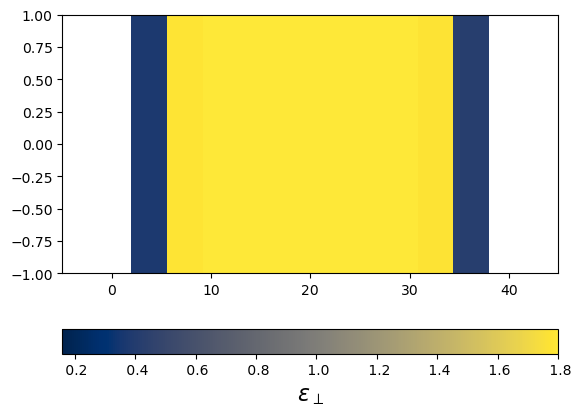

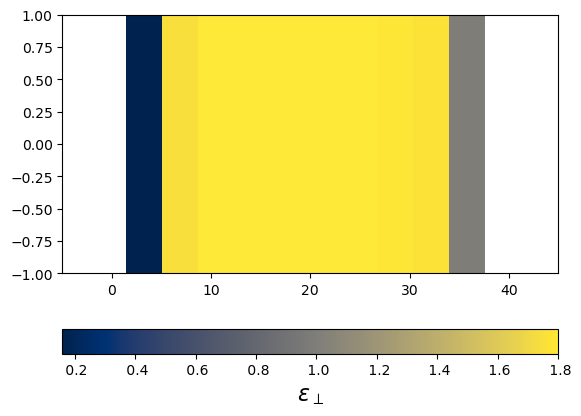

In [5]:
eps = []
zOs = []
plt.figure(figsize=(8, 3))
for ice in ['Ih', 'XI']:
    
    bias = [-0.5, 0.5]
    
    path = './Full/{}Au/'.format(ice)
    df = pd.read_csv(path+'charge.csv')
    z = df['z'].to_numpy(); charge = df['charge'].to_numpy(); chargesum = df['chargesum'].to_numpy()
    df = pd.read_csv(path+'potential.csv')
    z = df['z'].to_numpy(); potential = df['potential'].to_numpy()

    eps0 = 5.52635e-3
    A = np.cos(np.pi/6)*8.88**2
    w = 3.615
    
    E = 0; i0 = 350; di = 400
    for i in range(i0,i0+di):
        E -= (potential[i+1]-potential[i])/z[1]
    E /= di
    
    dips = np.zeros((2,8,10))
    zs = np.zeros((2,8,10))
    for i in range(2):
        file = path+'ts_{}/ts_au_layer_centres.dips'.format(bias[i])
        f = open(file)
        f1 = f.readlines()
        f.close()
        for j in range(len(f1)):
            L = [float(x) for x in f1[j].split()]
            l = int((L[2]-22)//3.615)
            k = np.where(dips[i,:,l]==0)[0][0]
            dips[i,k,l] = L[5]
            zs[i,k,l] = L[2]
    PC = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
    zO = np.mean(zs[0,:,:],axis=0)

    DC = eps0*E + np.mean(PC[4:6])/w
    
    zOs.append(zO)
    eps.append(1/(1-PC/DC/w))
    
    avgz, avgchargesum = runn_avg(z, chargesum, 1.8075)
    avgP = -(avgchargesum/A - DC)
    
    if ice == 'Ih':
        plt.plot(avgz-19.33464, 1/(1-avgP/DC), 'b', label='Eqs. 7-9 (Full Capacitor Ih)')
    elif ice == 'XI':
        plt.plot(avgz-19.33464, 1/(1-avgP/DC), 'r', label='Eqs. 7-9 (Full Capacitor XI)')
plt.minorticks_on()
plt.grid()
plt.ylim(1.5,2.5)
plt.xlim(0,40)
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=20)
plt.ylabel(r'$\epsilon_{\perp}$ from $\Delta\rho$', fontsize=20)
plt.legend(fontsize=14,loc='upper center')
plt.tick_params(axis='both', which='major', labelsize=14)

for i in range(2):
    plt.figure()
    
    # Data
    x = zOs[i]-19.33464
    y = eps[i]
    x_edges = (x[:-1] + x[1:]) / 2
    x_edges = np.concatenate(([x[0] - (x_edges[0] - x[0])],
                              x_edges,
                              [x[-1] + (x[-1] - x_edges[-1])]))
    vmin, vmax = 0.159, 1.801
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    y_edges = [-1, 1]
    C = y[np.newaxis, :]

    # Plot as vertical strips
    plt.pcolormesh(x_edges, y_edges, C, shading='flat', cmap='cividis', alpha=1, norm=norm)
    cbar = plt.colorbar(orientation="horizontal", format='%4.1f')
    cbar.set_label(r'$\epsilon_{\perp}$', fontsize=16)
    plt.ylim(-1, 1)  # "infinite" vertical strips, extend as you like
    plt.xlim(-5,45.00485)

plt.show()

# Figure S3

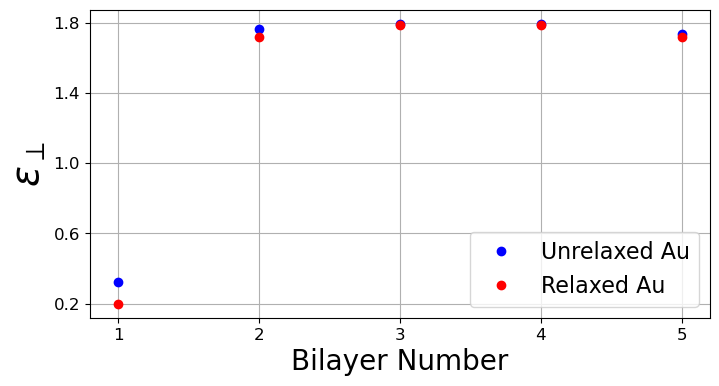

In [6]:
A = np.cos(np.pi/6)*8.88**2
w = 3.615
eps0 = 5.52635e-3

path = './Half-Full/IhAu_Relax0/'
dips1 = get_dips(path+'water_centers1.dips', 5, 20)
dips0 = get_dips(path+'water_centers0.dips', 5, 20)

df = pd.read_csv(path+'potential.csv')
z = df['z'].to_numpy(); VH = df['potential'].to_numpy()

E = -np.polyfit(z[600:800],VH[600:800],1)[0]

dP = np.sum(dips1-dips0, axis=0)/(A*w)
D = eps0*E
eps = 1/(1-dP/D)
prev_eps = np.array([0.32272484, 1.76076171, 1.79164031, 1.79358021, 1.73624262])

plt.figure(figsize=(8,4))
plt.plot(np.arange(1,6), prev_eps, 'bo', label='Unrelaxed Au')
plt.plot(np.arange(1,6), eps, 'ro', label='Relaxed Au')
plt.xlabel(r'Bilayer Number',fontsize=20)
plt.ylabel(r'$\epsilon_\perp$',fontsize=28)
plt.xticks(np.arange(1,6),fontsize=12)
plt.yticks(np.arange(0.2,2,0.4),fontsize=12)
plt.grid()
plt.legend(fontsize=16)
plt.show()

# Figure S4

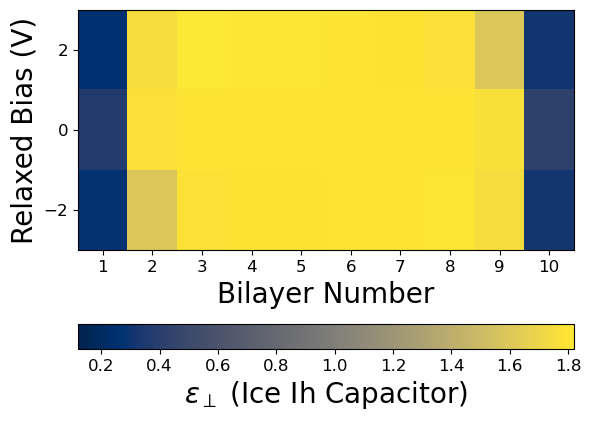

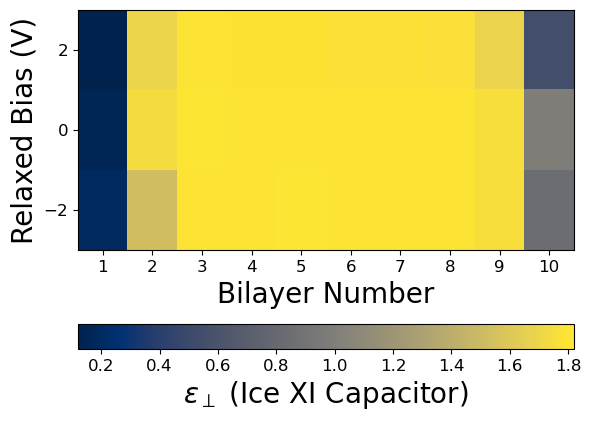

In [7]:
A = np.cos(np.pi/6)*8.88**2
w = 3.615
eps0 = 5.52635e-3

for ice in ['Ih', 'XI']:
    plt.figure()
    path = './Full/{}Au_Relax/'.format(ice)
    directs = ['-2','0','2']


    eps = np.zeros((len(directs),10))
    for i in range(len(directs)):
        if directs[i] != '0':
            dips = get_dips(path+'ts_'+directs[i]+'/water_centers1.dips',10,22)
            dips0 = get_dips(path+'ts_'+directs[i]+'/water_centers0.dips',10,22)
            df = pd.read_csv(path+'ts_'+directs[i]+'/potential.csv')
            z = df['z'].to_numpy(); potential = df['potential'].to_numpy()
            dE = -np.polyfit(z[400:800],potential[400:800], 1)[0]
            V = float(directs[i])
            dP = np.sum(dips-dips0, axis=0)/(A*w)
            dD = eps0*dE + np.mean(dP[4:6])
            eps[i,:] = 1/(1-dP/dD)
            
        else:
            zero_ind = i

    iceih = np.array([0.37090326, 1.77809193, 1.79786829, 1.7991127, 1.79971063, 1.79946145, 1.79821655, \
                      1.79583118, 1.77203094, 0.41907307])
    icexi = np.array([0.15910742, 1.74494359, 1.80054262, 1.79887982, 1.79634265, 1.79590425, 1.79580686, \
                      1.79361831, 1.76621003, 0.99535601])

    if ice == 'Ih':
        eps[zero_ind,:] = iceih
    elif ice == 'XI':
        eps[zero_ind,:] = icexi

    x = np.arange(1,11)
    y = np.array([float(x) for x in directs])
    X, Y = np.meshgrid(x, y)
    Z = eps

    dx = x[1] - x[0]
    dy = y[1] - y[0]
    
    vmin = 0.12
    vmax = 1.82
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    im = plt.imshow(Z, extent=[x.min()-dx/2, x.max()+dx/2, y.min()-dy/2, y.max()+dy/2],
                    origin='lower', cmap='cividis', aspect='auto', norm=norm)
    plt.xlabel(r'Bilayer Number',fontsize=20)
    plt.ylabel(r'Relaxed Bias (V)',fontsize=20)
    plt.xticks(x,fontsize=12)
    plt.yticks(y,fontsize=12)

    cbar = plt.colorbar(im, orientation='horizontal', pad=0.2)
    cbar.set_label(r'$\epsilon_\perp$ (Ice {} Capacitor)'.format(ice), fontsize=20)
    cbar.ax.tick_params(labelsize=12)
plt.show()

# Figure S5

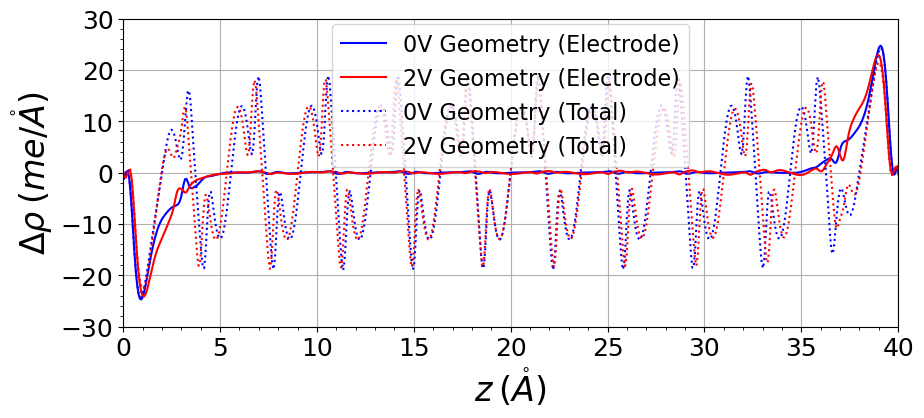

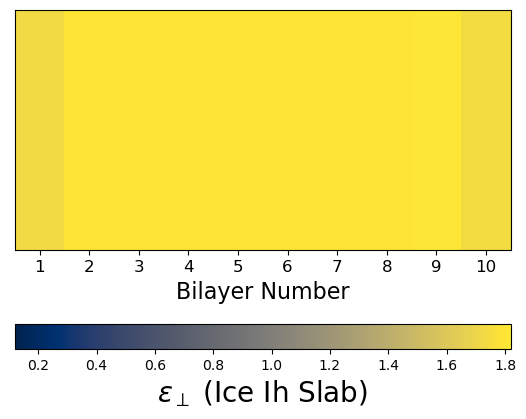

In [8]:
path = './Full/Ih/'
df = pd.read_csv(path+'charge.csv')
zS = df['z'].to_numpy(); chargeS = df['charge'].to_numpy(); chargesumS = df['chargesum'].to_numpy()

path = './Full/IhAu/'
df = pd.read_csv(path+'charge.csv')
zC = df['z'].to_numpy(); chargeC = df['charge'].to_numpy(); chargesumC = df['chargesum'].to_numpy()

path = './Full/IhAu_Relax/'
df = pd.read_csv(path+'chargeRS.csv')
zRS = df['z'].to_numpy(); chargeRS = df['charge'].to_numpy(); chargesumRS = df['chargesum'].to_numpy()
df = pd.read_csv(path+'chargeRC.csv')
zRC = df['z'].to_numpy(); chargeRC = df['charge'].to_numpy(); chargesumRC = df['chargesum'].to_numpy()

DS = eps0*0.05
DC = -DS*0.9523775803782978

DRS = DS
DRC = -0.0005358656101014736

plt.figure(figsize=(10, 4))
plt.plot(zC-19.33464, (chargeC-chargeS*DC/DS)*1e3*DRC/DC,'b',label=r'0V Geometry (Electrode)')
plt.plot(zRC-20.3543, (chargeRC-chargeRS*DRC/DRS)*1e3,'r',label=r'2V Geometry (Electrode)')
plt.plot(zC-19.33464, (chargeC)*1e3*DRC/DC,'b:', label=r'0V Geometry (Total)')
plt.plot(zRC-20.3543, (chargeRC)*1e3,'r:', label=r'2V Geometry (Total)')

plt.xlabel(r'$z \: (\mathring{A})$', fontsize=24)
plt.ylabel(r'$\Delta \rho \: (me/\mathring{A})$',fontsize=24)
plt.legend(fontsize=16,loc="center",
           bbox_to_anchor=(20, 15),
           bbox_transform=plt.gca().transData)
plt.xlim(0,40)
plt.ylim(-30,30)
plt.minorticks_on()
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=18)
plt.figure()

A = np.cos(np.pi/6)*8.88**2
w = 3.615
eps0 = 5.52635e-3

path = './Full/IhAu_Relax/'
dips = get_dips(path+'water_centers1.dips',10,22)
dips0 = get_dips(path+'water_centers-1.dips',10,22)
dP = np.sum(dips-dips0, axis=0)/(A*w)

dD = eps0*0.05
eps = 1/(1-dP/dD)

x = np.arange(1,11)
y = eps
X, Y = np.meshgrid(x, y)
Z = eps

x_edges = (x[:-1] + x[1:]) / 2
x_edges = np.concatenate(([x[0] - (x_edges[0] - x[0])],
                          x_edges,
                          [x[-1] + (x[-1] - x_edges[-1])]))
vmin, vmax = 0.12, 1.82
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
y_edges = [-1, 1]
C = y[np.newaxis, :]

# Plot as vertical strips
plt.pcolormesh(x_edges, y_edges, C, shading='flat', cmap='cividis', alpha=1, norm=norm)
cbar = plt.colorbar(orientation="horizontal", pad=0.2)
cbar.set_label(r'$\epsilon_{\perp}$ (Ice Ih Slab)', fontsize=20)
plt.xlabel(r'Bilayer Number',fontsize=16)
plt.xticks(x,fontsize=12)
plt.yticks([])
plt.ylim(-1, 1)  # "infinite" vertical strips, extend as you like
plt.xlim(0.5,10.5)

plt.show()

# Figure S6

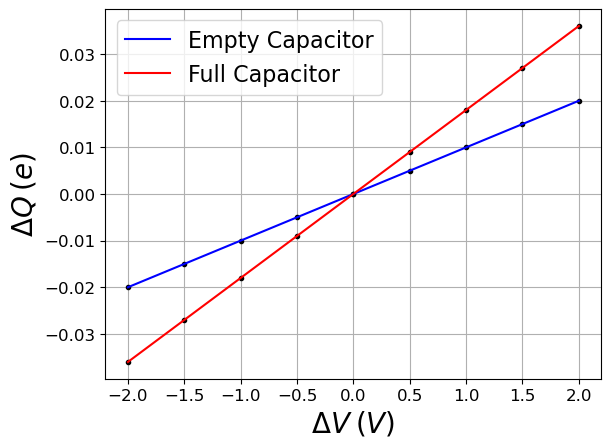

In [9]:
path = './Full/Ih/'
df = pd.read_csv(path+'charge.csv')
z0 = df['z'].to_numpy(); charge0 = df['charge'].to_numpy(); chargesum0 = df['chargesum'].to_numpy()
# z0, charge0, chargesum0 = CalcCube(path+'R_Ice_Au1.cube',path+'R_Ice_Au-1.cube',RHO=True)


# path = '../../../Downloads/Ice_Project/TS_2elec/1h1/'
path = './Full/IhAu/'
directs = ['ts_-2','ts_-1.5','ts_-1','ts_-0.5','ts_0','ts_0.5','ts_1','ts_1.5','ts_2']
Qs = []
Qes = []
Vs = []

for i in range(len(directs)):
    df = pd.read_csv(path+directs[i]+'/charge.csv')
    z = df['z'].to_numpy(); charge = df['charge'].to_numpy(); chargesum = df['chargesum'].to_numpy()
    V = float(directs[i][3:])
    Vs.append(V)
    Qs.append(np.where(V>=0, 1, -1)*np.max(np.abs(chargesum+chargesum0*0.9523775803782978*V)))
    df = pd.read_csv(path+'empty/'+directs[i]+'/charge.csv')
    z_e = df['z'].to_numpy(); charge_e = df['charge'].to_numpy(); chargesum_e = df['chargesum'].to_numpy()
    Qes.append(np.where(V>=0, 1, -1)*np.max(np.abs(chargesum_e)))
Qs = np.array(Qs)
Qes = np.array(Qes)
    
plt.plot(Vs, Qs, 'k.')
plt.plot(Vs, Qes, 'k.')
bs = np.linspace(-2,2,1000)
pe = np.polyfit(Vs, Qes, 1)
plt.plot(bs, pe[0]*bs+pe[1], 'b', label='Empty Capacitor')
p = np.polyfit(Vs, Qs, 1)
plt.plot(bs, p[0]*bs+p[1], 'r', label='Full Capacitor')
plt.grid()
plt.xlabel(r'$\Delta V \: (V)$', fontsize=20)
plt.ylabel(r'$\Delta Q \: (e)$', fontsize=20)
plt.xticks(Vs,fontsize=12)
plt.yticks(1e-2*np.arange(-3,4),fontsize=12)
plt.legend(fontsize=16)
plt.show()

# Figure S7

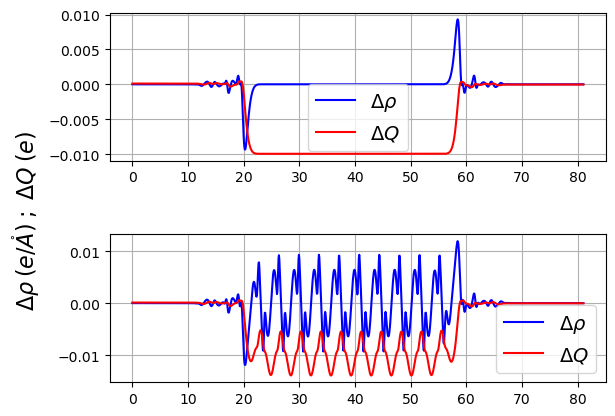

In [10]:
path = './Full/IhAu/'

df = pd.read_csv(path+'empty/charge.csv')
z0 = df['z'].to_numpy(); charge0 = df['charge'].to_numpy(); chargesum0 = df['chargesum'].to_numpy()
chargesum0 = chargesum0-chargesum0[-1]/2
Q0 = np.abs(np.min(chargesum0))

df = pd.read_csv(path+'charge.csv')
z1 = df['z'].to_numpy(); charge1 = df['charge'].to_numpy(); chargesum1 = df['chargesum'].to_numpy()
chargesum1 = chargesum1-chargesum1[-1]/2

plt.subplot(2,1,1)
plt.plot(z0,charge0,'b',label=r'$\Delta \rho$')
plt.plot(z0,chargesum0,'r',label=r'$\Delta Q$')
plt.grid()
plt.legend(fontsize=14)
plt.subplot(2,1,2)
plt.plot(z1,charge1,'b',label=r'$\Delta \rho$')
plt.plot(z1,chargesum1,'r',label=r'$\Delta Q$')
plt.grid()
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.text(-22,0,r'$\Delta \rho \: (e/\mathring{A}) \; ; \; \Delta Q \: (e)$',rotation=90,fontsize=16)
plt.show()

# Figure S8

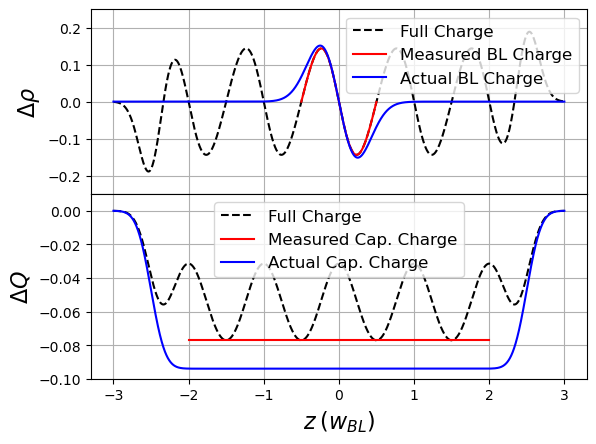

In [11]:
a = 0.25
b = 0.15
x = np.arange(-3,3, 1e-3)
f0 = 0.25*np.exp(-0.5*((x+2.5)/b)**2)
f1 = (x+2)*np.exp(-0.5*((x+2)/a)**2)
f2 = (x+1)*np.exp(-0.5*((x+1)/a)**2)
f3 = x*np.exp(-0.5*(x/a)**2)
f4 = (x-1)*np.exp(-0.5*((x-1)/a)**2)
f5 = (x-2)*np.exp(-0.5*((x-2)/a)**2)
f6 = -0.25*np.exp(-0.5*((x-2.5)/b)**2)
plt.subplot(2,1,1)
plt.plot(x, -(f0+f1+f2+f3+f4+f5+f6), 'k--', label='Full Charge')
plt.plot(x[2500:3500], -(f0+f1+f2+f3+f4+f5+f6)[2500:3500], 'r', label='Measured BL Charge')
plt.plot(x, -f3, 'b', label='Actual BL Charge')
plt.grid()
plt.ylim(-0.25,0.25)
plt.xlabel(r'$z \:(w_{BL})$', fontsize=16)
plt.ylabel(r'$\Delta \rho$', fontsize=16)
plt.legend(fontsize=12,loc='upper right')

plt.subplot(2,1,2)
plt.plot(x, -np.cumsum(f0+f1+f2+f3+f4+f5+f6)*1e-3, 'k--', label='Full Charge')
plt.plot(np.arange(-2,3), np.min(-np.cumsum(f0+f1+f2+f3+f4+f5+f6)*1e-3)*np.ones(5), 'r', label='Measured Cap. Charge')
plt.plot(x, -np.cumsum(f0+f6)*1e-3, 'b', label='Actual Cap. Charge')
plt.grid()
plt.ylim(-0.1,0.01)
plt.xlabel(r'$z \:(w_{BL})$', fontsize=16)
plt.ylabel(r'$\Delta Q$', fontsize=16)
plt.legend(fontsize=12)
plt.subplots_adjust(hspace=0)
plt.show()

# Figure S9

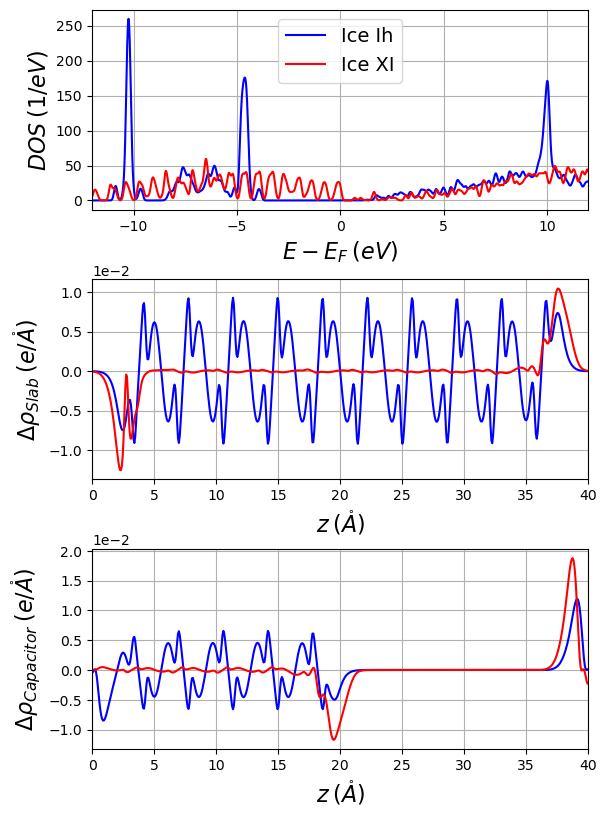

In [12]:
df = pd.read_csv('./Full/Ih/charge.csv')
Ih = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
df = pd.read_csv('./Full/XI/charge.csv')
XI = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
    
plt.figure(figsize=(6.4, 9.6))
plt.subplot(3,1,1)
Ih_EF = [-3.325870, -3.134494, -3.322503]
XI_EF = [-4.825616, -4.819747, -4.813931]
for bias in range(1):
    plotDOS('./Full/Ih/Ice_Au{}.DOS'.format(bias), Ih_EF[bias+1], 'Ice Ih')

for bias in range(1):
    plotDOS('./Full/XI/Ice_Au{}.DOS'.format(bias), XI_EF[bias+1], 'Ice XI', color='r')
plt.xlim(-12,12)
plt.xlabel(r'$E-E_F \: (eV)$', fontsize=16)
plt.ylabel(r'$DOS \: (1/eV)$', fontsize=16)
plt.grid()
plt.legend(fontsize=14, loc='upper center')
plt.subplot(3,1,2)
plt.plot(Ih[0]-19.33464, Ih[1]*0.9523775803782978,'b',label='Ice Ih')
plt.plot(XI[0]-19.33464, XI[1]*0.9523775803782978,'r',label='Ice XI')
plt.xlim(0,40)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.ylabel(r'$\Delta \rho_{Slab} \: (e/\mathring{A})$', fontsize=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.subplot(3,1,3)
df = pd.read_csv('./Half-Full/IhAu/charge.csv')
Ih1 = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
df = pd.read_csv('./Half-Full/XIAu/charge.csv')
XI1 = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
plt.plot(Ih1[0]-19.33464, Ih1[1],'b',label='Ice Ih')
plt.plot(XI1[0]-19.33464, XI1[1],'r',label='Ice XI')
plt.xlim(0,40)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.ylabel(r'$\Delta \rho_{Capacitor} \: (e/\mathring{A})$', fontsize=16)
plt.subplots_adjust(hspace=0.35)
plt.grid()
plt.show()